In [162]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# Let’s run the basic SIR model

In [163]:
# describe the model
def deriv(y, t, N, beta, k, delta):
    S, E, I, R, D, In, Ink, Inm = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N -delta * E
    dIdt = delta * E - k * I
    dRdt = k * I * 0.98
    dDdt = k * I * 0.02
    dIndt = k * I * 0.01
    dInkdt = dIndt * 0.288
    dInmdt = dIndt * 0.722
    return dSdt, dEdt, dIdt, dRdt, dDdt, dIndt, dInkdt, dInmdt

In [164]:
# describe the parameters
N =  10000000              # population
beta = 2.5            
k=1/7 
delta = 1.0 / 5.0
S0, E0, I0, R0, D0, In0, Ink0, Inm0 = N-1, 1, 0, 0, 0, 0, 0, 0 # initial conditions: one infected, rest susceptible

In [165]:
t = np.linspace(0, 150, 1000) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0, In0, Ink0, Inm0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, k, delta))
S, E, I, R, D, In, Ink, Inm = ret.T

In [166]:
def plotsir(t, S, E, I, R, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Deceased')




  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("plot.png")  
  plt.show();
    


In [167]:
def plotsir2(t, In, Ink, Inm):
  f, ax = plt.subplots(1,1,figsize=(10,4))
 
  ax.plot(t, In, 'k', alpha=0.7, linewidth=2, label='Intensive care')
  ax.plot(t, Ink, 'c', alpha=0.7, linewidth=2, label='Intensive care women')
  ax.plot(t, Inm, 'y', alpha=0.7, linewidth=2, label='Intensive care men')



  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  
  plt.show();

plot the graph

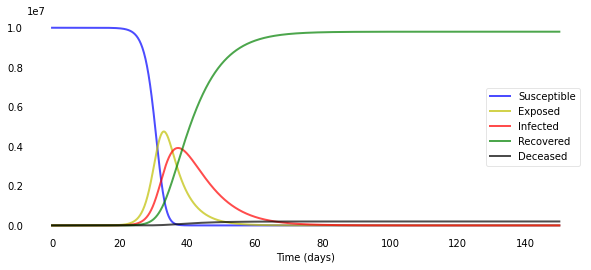

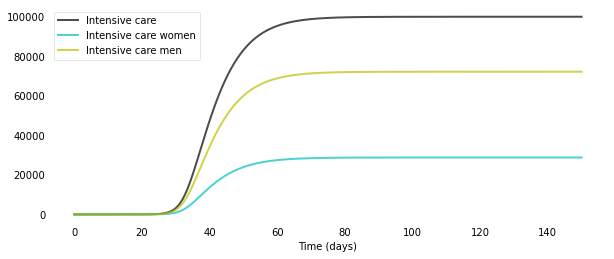

In [168]:

plotsir(t, S, E, I, R, D)
plotsir2(t, In, Ink, Inm)